In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fcmeans import FCM
from sklearn.cluster import KMeans
import random

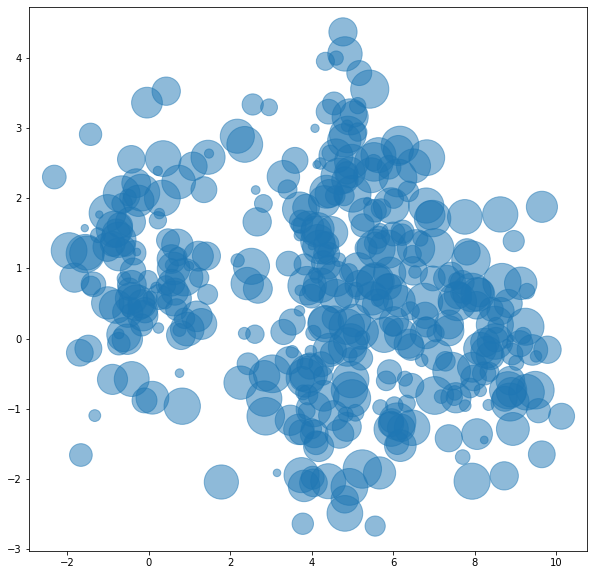

In [2]:
n_samples = 100

X = np.concatenate((
    np.random.normal((0, 1), size=(n_samples, 2)),
    np.random.normal((4, -0.5), size=(n_samples, 2)),
    np.random.normal((8, 0), size=(n_samples, 2)),
    np.random.normal((5, 2), size=(n_samples, 2))
))
X_fcm = X
X_kmean = X
size = [random.randint(50, 1500) for i in range(n_samples * 4)]

plt.figure(figsize=(10, 10))
plt.scatter(X[:,0], X[:,1], alpha = .5 , s = size)
plt.show()

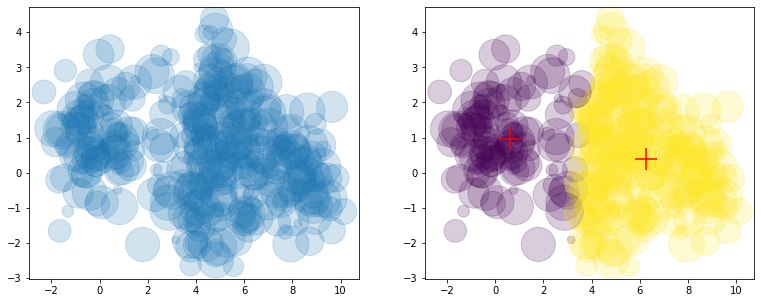

In [3]:
fcm = FCM(n_clusters=2)
fcm.fit(X_fcm)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X_fcm)

# plot result
f, axes = plt.subplots(1, 2, figsize = (13,  5))
axes[0].scatter(X_fcm[:,0], X_fcm[:,1], alpha = .2 , s = size)
axes[1].scatter(X_fcm[:,0], X_fcm[:,1], c = fcm_labels, alpha= 0.2 , s = size)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='r')
plt.show()

## FUZZY - C MEANS

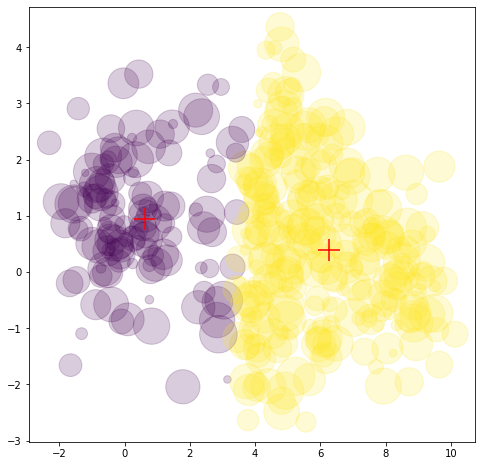

In [4]:
plt.figure(figsize  = (8 , 8))
plt.scatter(X[:,0], X[:,1], alpha= 0.2 , s = size , c = fcm_labels)
plt.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='r')
plt.show()

## K-MEANS

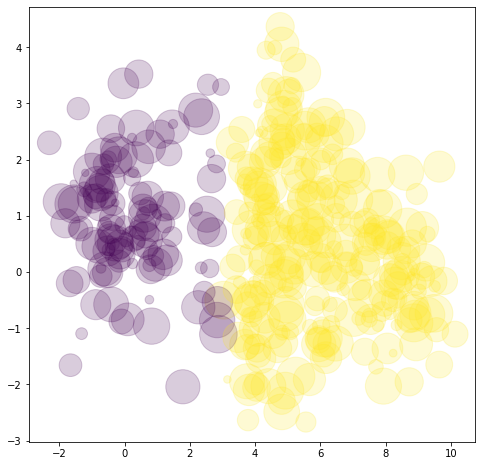

In [5]:
kmeans = KMeans(n_clusters = 2 , random_state=0).fit(X_kmean)
label = kmeans.labels_

# for i in label:
#     if i == 0:
#         i = 1
#     else: i = 0

center = kmeans.cluster_centers_
plt.figure(figsize  = (8 , 8))
plt.scatter(X[:, 0] , X[: ,1], alpha = 0.2 , c = label,  s = size )
plt.show()

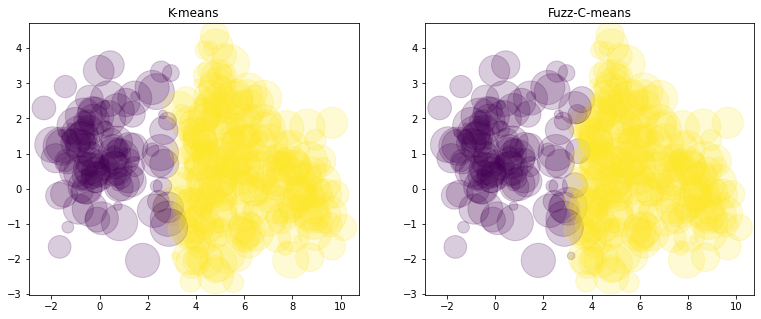

In [6]:
f, ax = plt.subplots ( 1, 2 , figsize  = (13 ,5))
ax[0].title.set_text('K-means')
ax[1].title.set_text('Fuzz-C-means')
ax[0].scatter(X[:, 0] , X[: ,1], alpha = 0.2 , c = label,  s = size )
ax[1].scatter(X[:,0], X[:,1], alpha= 0.2 , s = size , c = fcm_labels)
plt.show()

In [7]:
n_clusters_list = [2, 3, 4, 5, 6, 7]
models = list()
for n_clusters in n_clusters_list:
    fcm = FCM(n_clusters = n_clusters)
    fcm.fit(X)
    models.append(fcm)

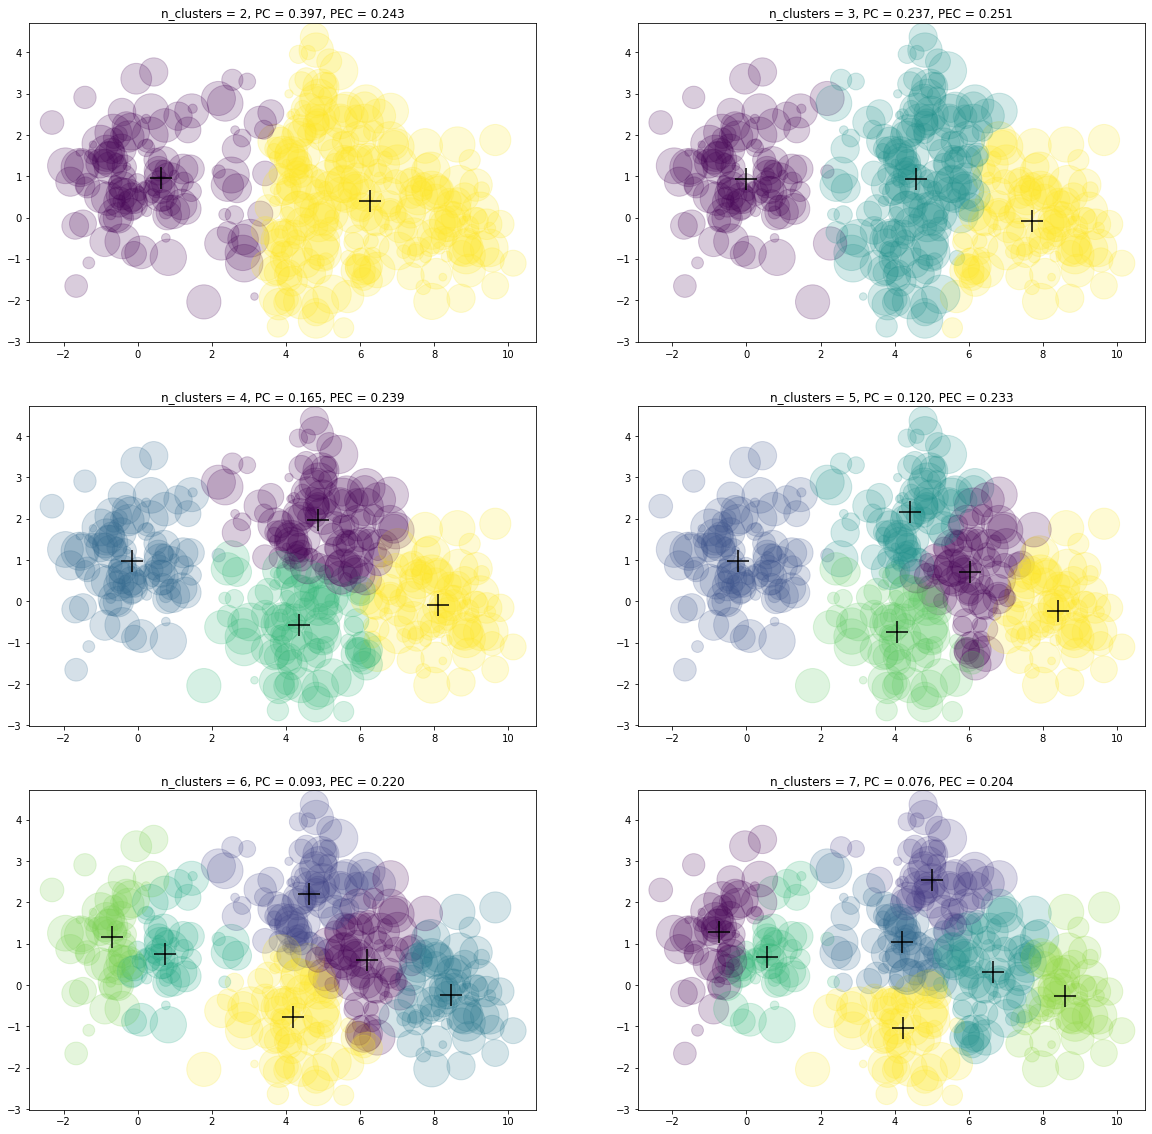

In [8]:
# outputs
num_clusters = len(n_clusters_list)
rows = int(np.ceil(np.sqrt(num_clusters)))
cols = int(np.ceil(num_clusters / rows))
f, axes = plt.subplots(rows, cols, figsize=(20,20))
for n_clusters, model, axe in zip(n_clusters_list, models, axes.ravel()):
    # get validation metrics
    pc = model.partition_coefficient
    pec = model.partition_entropy_coefficient
    
    fcm_centers = model.centers
    fcm_labels = model.predict(X)
    # plot result
    axe.scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.2 , s = size)
    axe.scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='black')
    axe.set_title(f'n_clusters = {n_clusters}, PC = {pc:.3f}, PEC = {pec:.3f}')
plt.show()